In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns

In [2]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
dataset = pd.DataFrame(boston.data)
dataset.columns = boston.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
dataset['Price'] = boston.target
dataset.shape

(506, 14)

In [5]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# null values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
dataset[dataset.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price


In [9]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
corr = dataset.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


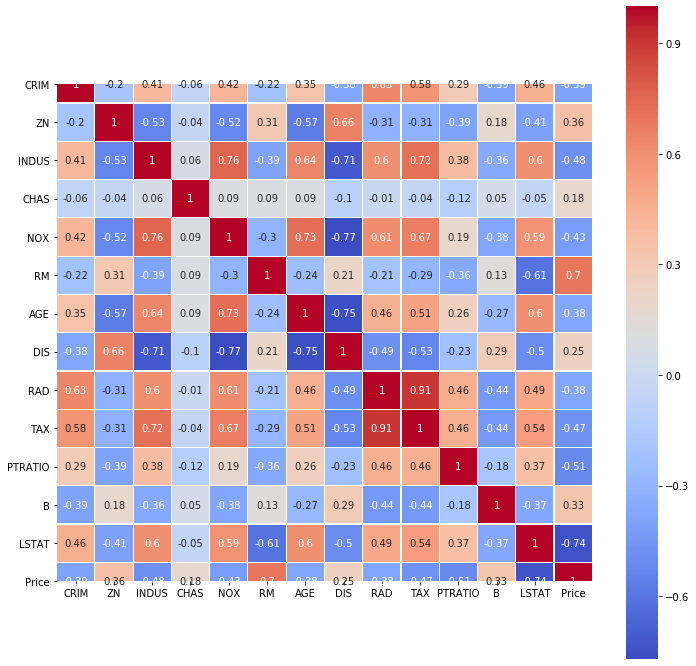

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(data=corr.round(2),cmap='coolwarm',linewidths=0.2,square=True,annot=True)

In [12]:
x = dataset.drop(columns="Price")
y = dataset['Price']
x.shape

(506, 13)

In [13]:
# feature selection using correlation
impact_cols_df=corr[((corr['Price'] >= 0.45) | (corr['Price'] <=-0.45)) & (corr['Price']!=1)]
#impact_cols.remove('Price')
impact_cols_df
impact_cols = list(impact_cols_df.index.values)
impact_cols.remove('INDUS')
impact_cols

['RM', 'TAX', 'PTRATIO', 'LSTAT']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.3,shuffle=True)

In [15]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [16]:
# not using vif as it is costly operation for feature selection . we can use lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["feature"] = x.columns
vif

,VIF,feature
0,1.791851,CRIM
1,2.344104,ZN
2,4.082619,INDUS
3,1.065870,CHAS
4,4.326332,NOX
5,1.907580,RM
6,3.214026,AGE
7,4.217542,DIS
8,7.706206,RAD
9,9.324117,TAX


In [17]:
vif[vif["VIF"]<=5].reset_index()

,index,VIF,feature
0,0,1.791851,CRIM
1,1,2.344104,ZN
2,2,4.082619,INDUS
3,3,1.065870,CHAS
4,4,4.326332,NOX
5,5,1.907580,RM
6,6,3.214026,AGE
7,7,4.217542,DIS
8,10,1.733820,PTRATIO
9,11,1.320088,B


In [53]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV
from sklearn.model_selection import GridSearchCV
lr = LinearRegression()
lasso = LassoCV()

In [72]:
alpha=[0.0000001,0.0001,0.001,0.01,1,2,3,5,7,10]
lasso_3 = LassoCV(alphas=alpha,cv=3,max_iter=100000)

In [73]:
lasso_3.fit(x_scaled,y_train)

LassoCV(alphas=[1e-07, 0.0001, 0.001, 0.01, 1, 2, 3, 5, 7, 10], copy_X=True,
        cv=3, eps=0.001, fit_intercept=True, max_iter=100000, n_alphas=100,
        n_jobs=None, normalize=False, positive=False, precompute='auto',
        random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [74]:
lasso_3.alpha_,lasso_3.score(x_scaled,y_train)

(1e-07, 0.7465991966746788)

In [82]:
alpha=[0.0000001,0.0001,0.001,0.01,1,2,3,5,7,10]
lasso_5 = LassoCV(alphas=alpha,cv=5,max_iter=100000)
lasso_5.fit(x_scaled,y_train)
lasso_5.alpha_,lasso_5.score(x_scaled,y_train)

(1e-07, 0.7465991966746788)

In [83]:
alpha=[0.0000001,0.0001,0.001,0.01,1,2,3,5,7,10]
lasso_10 = LassoCV(alphas=alpha,cv=10,max_iter=100000)
lasso_10.fit(x_scaled,y_train)
lasso_10.alpha_,lasso_10.score(x_scaled,y_train)

(0.01, 0.746533433232326)

In [86]:
#lasso_5,lasso_3 has done better compared to 10. so cv=5
lasso_5.coef_

array([-1.08673053,  1.28610241, -0.06070376,  1.03108549, -1.68878118,
        2.16731213, -0.09530713, -3.32626976,  2.88971741, -2.39272134,
       -1.74561407,  0.85424194, -3.70842307])

In [91]:
from sklearn.metrics import r2_score

In [92]:
x_train_pred = lasso_5.predict(x_scaled)
r2_score(x_train_pred,y_train)

0.6605932277143423

In [93]:
import pickle
# saving the model to the local file system
filename = 'scaler_boston.pickle'
pickle.dump(scaler, open(filename, 'wb'))

In [100]:
loaded_scalar = pickle.load(open('scaler_boston.pickle','rb'))
x_test_scaled = loaded_scalar.fit_transform(x_test)
x_test_predict = lasso_5.predict(x_test_scaled)

In [106]:
x_test_predict[0:5]

array([10.33444622, 24.91016152, 16.35122587, 17.31549367, 34.44908154])

In [ ]:
y